<a href="https://colab.research.google.com/github/olaemy/intro-tf/blob/master/MNIST_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [3]:
num_classes = 10 #We are going to be classifying 10 digits
img_rows, img_cols = 28, 28 #No of Pixels on height = 28 and width = 28 

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

We can check the number and size of the training/testing samples: 

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

i.e. we have 60,000 training samples and 10,000 testing one, with each sample an image of $28 \times 28$ pixels.

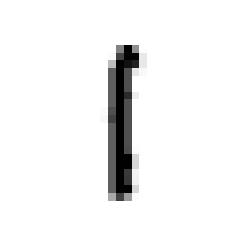

In [8]:
img_idx = np.random.randint(0, x_test.shape[0])
plt.imshow(x_test[img_idx], cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [9]:
y_test[img_idx]

1

As we can see, our images match their ground-truth label, which is good news!

However, as our Artifcial Neural Network only accepts column vectors, we need to _flatten_ the images into 1D vectors, i.e. vectors of shape `(1, 784)` (since $28 \times 28 = 784$):

Also, let us have a look at our pixel values:

In [10]:
print("Pixel values between {} and {}".format(x_train.min(), x_train.max()))

Pixel values between 0 and 255


Those are normal integer values for images with 8 bits per channel (`uint8`)... These values may be however too big for some of our operations. For instance, given a too big input value, our sigmoid may return `nan` ("_not a number_") because of the exponential function it uses, which may "overflow" with a large input value.

It is thus customary to *normalize* the input data, i.e. to scale the values between 0 and 1 (or -1 and 1):

In [7]:
x_train, x_test = x_train / 255., x_test / 255.
print("Normalized pixel values between {} and {}".format(x_train.min(), x_train.max()))

Normalized pixel values between 0.0 and 1.0


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv2D,MaxPooling2D,Flatten

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',mode='min', patience=15)

In [11]:
X_train = x_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test = x_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [15]:
model = Sequential()

model.add(Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output
model.add(Dense(10, activation='softmax'))


# OR You can Decide to Use
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(), #Convert Image(28,28) to input of size 28*28=784
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test),batch_size=32,callbacks=[earlystopping])

Epoch 1/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2877 - accuracy: 0.9162 - val_loss: 0.0601 - val_accuracy: 0.9804
Epoch 2/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0565 - val_accuracy: 0.9821
Epoch 3/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0342 - accuracy: 0.9900 - val_loss: 0.0430 - val_accuracy: 0.9856
Epoch 4/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0443 - val_accuracy: 0.9863
Epoch 5/100
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0169 - accuracy: 0.9950 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 6/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0417 - val_accuracy: 0.9870
Epoch 7/100
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               649088    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 650,678
Trainable params: 650,678
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras.models import load_model
model.save('my_model_cnn.h5')

In [19]:
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.150379,0.955867,0.060069,0.9804
1,0.054430,0.983033,0.056512,0.9821
2,0.035184,0.989550,0.042993,0.9856
3,0.024466,0.992133,0.044333,0.9863
4,0.017381,0.994450,0.043957,0.9864


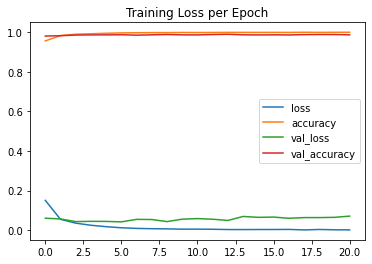

In [21]:
losses.plot()
plt.title("Training Loss per Epoch");

In [ ]:
from tensorflow.keras.models import load_model
model.save('my_model.h5')

In [ ]:
# later_model = load_model('my_model.h5')
# later_model.predict(new_gem)

over **90%** of accuracy! This is much better. Congratulations, we implemented and trained our first neural network classifier!

<p>Can You Beat The Score(^-^)?</p>
<p>Play Around the parameters</p>
<p>Brush up on Week2 Materials including loss,optimizers,backpropagation etc</p>